### Multi-class classification with linear models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
fruits=pd.read_table("fruit_data_with_colors.txt")

In [2]:
x=fruits[["mass","width","height"]]
y=fruits["fruit_label"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [3]:
from sklearn.svm import LinearSVC
clf=LinearSVC(C=5,random_state=0).fit(x_train,y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[ 0.02159171 -0.19559622 -0.39091958]
 [-0.0301301   0.63850532 -0.19185504]
 [ 0.01517969 -0.25886164 -0.17943701]
 [-0.01872851 -0.41075447  0.68097308]]
Intercepts:
 [-0.0987099   0.12906476 -0.05331941 -0.04211392]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Multi-class results on the fruit dataset

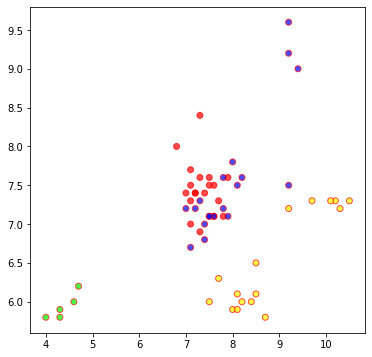

In [4]:
plt.figure(figsize=(6,6))
colors=["r","g","b","y"]
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])
plt.scatter(fruits["height"],fruits["width"],c=y,cmap=cmap_fruits,edgecolor="red",alpha=0.7)

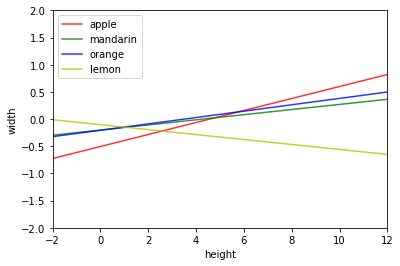

In [5]:
x_0_range=np.linspace(-10,15)
for w,b,color in zip(clf.coef_,clf.intercept_,colors):
    plt.plot(x_0_range,-(x_0_range*w[0]+b)/w[1],c=color,alpha=0.8)
plt.legend(list(fruits["fruit_name"].unique()))
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 2)
plt.show()

In [6]:
list(fruits["fruit_name"].unique())

['apple', 'mandarin', 'orange', 'lemon']

## Cross-validation

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=2)
cv_scores=cross_val_score(clf,x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [11]:
cv_scores

array([0.44444444, 0.77777778, 0.88888889, 0.66666667, 0.5       ])

## Validation curve example

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), x_train, y_train,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [13]:
print(train_scores)

[[0.79310345 0.72413793 0.76666667]
 [1.         0.82758621 0.8       ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]]


In [14]:
print(test_scores)

[[0.66666667 0.73333333 0.64285714]
 [0.46666667 0.4        0.5       ]
 [0.53333333 0.26666667 0.42857143]
 [0.33333333 0.26666667 0.35714286]]


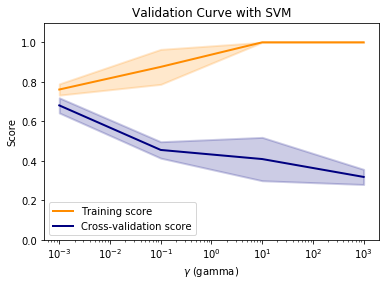

In [15]:
# This code based on scikit-learn validation_plot example
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()